# Object Detection in Images(OpenCV)

Object detection is methodology of detecting some specific patterns in the given image. These specific patterns are termed as object if patterns are very complex. Patterns / Objects are nothing but repetition of certain data points in some defined way. Pattern can be a line, some gradint, square (4 ines at 90 degree angle) and if we say complex pattern we can say objects such as yable, chair as they are square, rectangle in 3D. If we increase the complication further we can use the same for recognising faces, eyes, smile. And how to do this complex recognition is explained in this notebook.

This is 1 of 3 notebooks that will be available to trial and have fun with.
The next 2 are Object detection in videos and in webcams.

These are sample codes ready to run without any prior knowledge of AI, ML DNN, CNN these 50 lines are just plain simple ready** to eat material.

** here implies to certain libraries that one need to have at anycost.GPU is not at all mandatory.


All link will be mentioned along with the codes below.

For this basic tutorial we will be using the some classifiers. 
What are classifiers? In this case Classifiers are the .xml files provided by OpenCV-https://github.com/opencv/opencv/tree/master/data/haarcascades - DOWNLOAD ALL

All classifiers listed are names as 'haarcascade'+"_eye', this means this xml file has been trained for classifying EYES from the given image. Similarly you will find face, upperbody, smile etc. in the provided link. You can use as many as you want keep in mind this will only populate the output image produced.

1st step is setting the path for our downloaded classifiers as our program will be needing those .xml files to process the given input.In the uploaded content I have made a folder named as 'haar_cascades' which contains all the .xml files from OpenCV.

We now know where our classifiers files are but the system doesn't and so we will be obtaining path.
For example I stored my files in -'C:\Users\kuk\OBJECT_DETECTION\OBJECT_DETECTION_PICS\haar_cascades'

$$ point to be noted here 

the format obtained by our windows for the above adress is not supported by our reading function so we will modify the above address:: 

path = 'C:\\Users\\kuk\\OBJECT_DETECTION\\OBJECT_DETECTION_PICS\\haar_cascades'

'\' has been converted to '\\'


In [1]:
path = 'C:\\Users\\kuk\\OBJECT_DETECTION\\OBJECT_DETECTION_PICS\\haar_cascades'

In [2]:
# importing the main lib
import cv2
# if any error is occured during importing cv2, make sure to isolate the env and then 
# uninstall or install the required lib

In this example I waill be using 8 classifiers namely:
face, eye, upperbody, smile, profileface, lowerbody, fullbody, frontalface
you have the freedom to go full bezerk in this step, you can use as many classifiers as you can find online and just use them in the same steps as shown below.

We wil now be assigning the .xml classifier files to python variables.


In [3]:
# 'path + .xml' ensure that our python finds the file , we have defined path earlier 
face_cascade = cv2.CascadeClassifier(path + "\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(path +"\\haarcascade_eye.xml")
upperbody_cascade = cv2.CascadeClassifier(path + "\\haarcascade_upperbody.xml")
smile_cascade = cv2.CascadeClassifier(path+"\\haarcascade_smile.xml")
profileface_cascade = cv2.CascadeClassifier(path+"\\haarcascade_profileface.xml")
lowerbody_cascade = cv2.CascadeClassifier(path+"\\haarcascade_lowerbody.xml")
fullbody_cascade = cv2.CascadeClassifier(path+"\\haarcascade_fullbody.xml")
frontalface_alt_cascade = cv2.CascadeClassifier(path+"\\haarcascade_frontalface_alt.xml")

Now we have the Tool to operate but nothing to operate on. Here we will use OpenCV to read image from our dirctory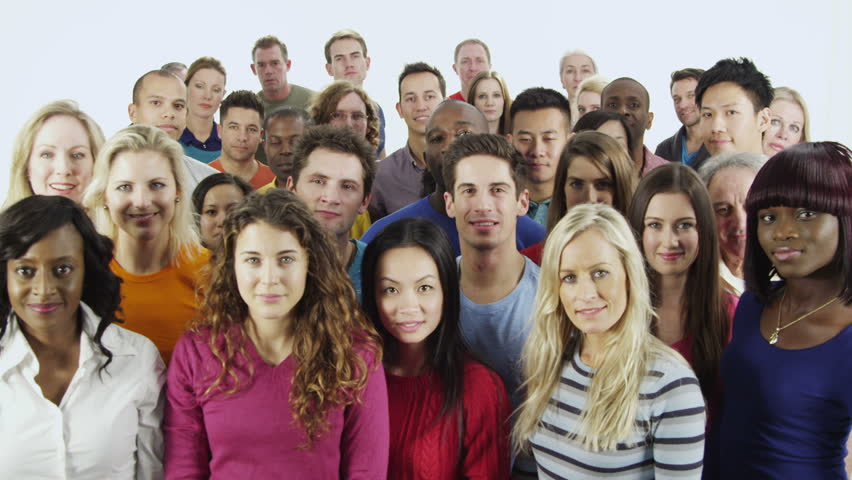
Here I have used some image from google searching for Crowd as I want many faces ,eyes and smile.

In [4]:
# reading image

img = cv2.imread('cr02.jpg')

# make sure image extension is also present in name i.e .jpg, .jpeg, .png all are different and
# any image with different format should be written clearly
print(img.shape)

(480, 852, 3)


We can see the image is of size 480x852 and 3 is the depth (COLOR CHANNELS RGB), we will be resizing our image smaller the better but since we have only one image and you might use some 4K image for testing, so we will use 1000x1000 as new img dimensions.

In [5]:
# COLOR_img is resized to desired value
img = cv2.resize(img,(1000,1000))

print(img.shape)

(1000, 1000, 3)


Our image now have 1000x1000x3 = 3,000,000 numeric values defining its content. We need to tone down this massive size of 3000,000.

A black and white image will have have same face and same smile and since we dont need color to recognize these attributes of face, we will reduce the image to Black and White image thus saving some compute time. Black and White image will have shape as 1000x1000

In [7]:
#COLOR_IMG is converted to GRAY_IMG
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray_img.shape)

(1000, 1000)


Our classifiers are trained such that they will return a bounding box aroud the feature they are meant to be recognize. Example our eye classifier sees a pair of EYE in out input image, how will it communicate with us??
It will return 4 values, numeric values of a BOUNDING BOX.

What are thses 4 values??
1st 2 are:: x, y values. Our image of 1000x1000 will have one corner as origin i.e 0,0 and with respect to that point we will get our x, y value thus pointing to a single POINT in the image. Now a single image is not sufficient to build a box around eyes.

2nd 2 values are:: w, h that is width and height. Now our rectangle have the dimensions it need.
How? We have 2 diagonal points which can give us the rectangular box. 1st set of points are x, y and second set of points are x+w, y+h.

lets see how to obtain these 4 points using the classifiers.


In [8]:
# cascades are usd to get coordinate values for each time they succeed to find there objective
faces = face_cascade.detectMultiScale(gray_img, 1.05, 5)
eyes = eye_cascade.detectMultiScale(gray_img, 1.05, 5)
upperbody = upperbody_cascade.detectMultiScale(gray_img, 1.05, 5)
smile = smile_cascade.detectMultiScale(gray_img, 1.05, 5)
profileface = profileface_cascade.detectMultiScale(gray_img, 1.05, 5)
lowerbody = lowerbody_cascade.detectMultiScale(gray_img, 1.05, 5)
fullbody = fullbody_cascade.detectMultiScale(gray_img, 1.05, 5)
frontalface_alt = frontalface_alt_cascade.detectMultiScale(gray_img, 1.05, 5)

# Note Here I have used Black_white= gray img for saving time for our classifiers.

In [9]:
print(faces.shape)

(27, 4)


The Number from faces.shape represents the number of faces our cassifier was able to detect in this image its 27 so we have 4 data points for 27 faces and thus 27 bounding boxes.

lets creat the bounding box and give it a text for all classifiers.

In [11]:
# construcuting rectangle and having texts on the same object
# (0,255,0) is the color scheme used you can use anythin you want
# cv2.putText is used to use assign text with every bounding box but to 
# reduce clutter I have only used it in 2 instances face and eyes
for x,y,w,h in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
    face_text = cv2.putText(img, "FACE",(x, y+10),cv2.FONT_HERSHEY_COMPLEX_SMALL,.7,(0,255,0))
  
    
for x,y,w,h in eyes:
    eyes_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)
    eyes_text = cv2.putText(img, "eyes",(x, y+10),cv2.FONT_HERSHEY_COMPLEX_SMALL,.7,(225,0,0))
    
for x,y,w,h in upperbody:
    upperbody_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 3)
    
for x,y,w,h in smile:
    smile_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,100,0), 3)
    
for x,y,w,h in profileface:
    profile_img = cv2.rectangle(img, (x,y), (x+w, y+h), (100,0,0), 3)
    
for x,y,w,h in lowerbody:
    lowerbody_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,100), 3)
    
for x,y,w,h in fullbody:
    fullbody_img = cv2.rectangle(img, (x,y), (x+w, y+h), (150,0,0), 3)
    
for x,y,w,h in frontalface_alt:
    frontalface_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,150,0), 3)
    
# NOTE: here I have used 'img' i.e COLOR IMAGE for bounding box as we need our output as colored

Last step is seeing our output image.

In [13]:
cv2.imshow("output",img)
cv2.waitKey(20000)

cv2.destroyAllWindows()

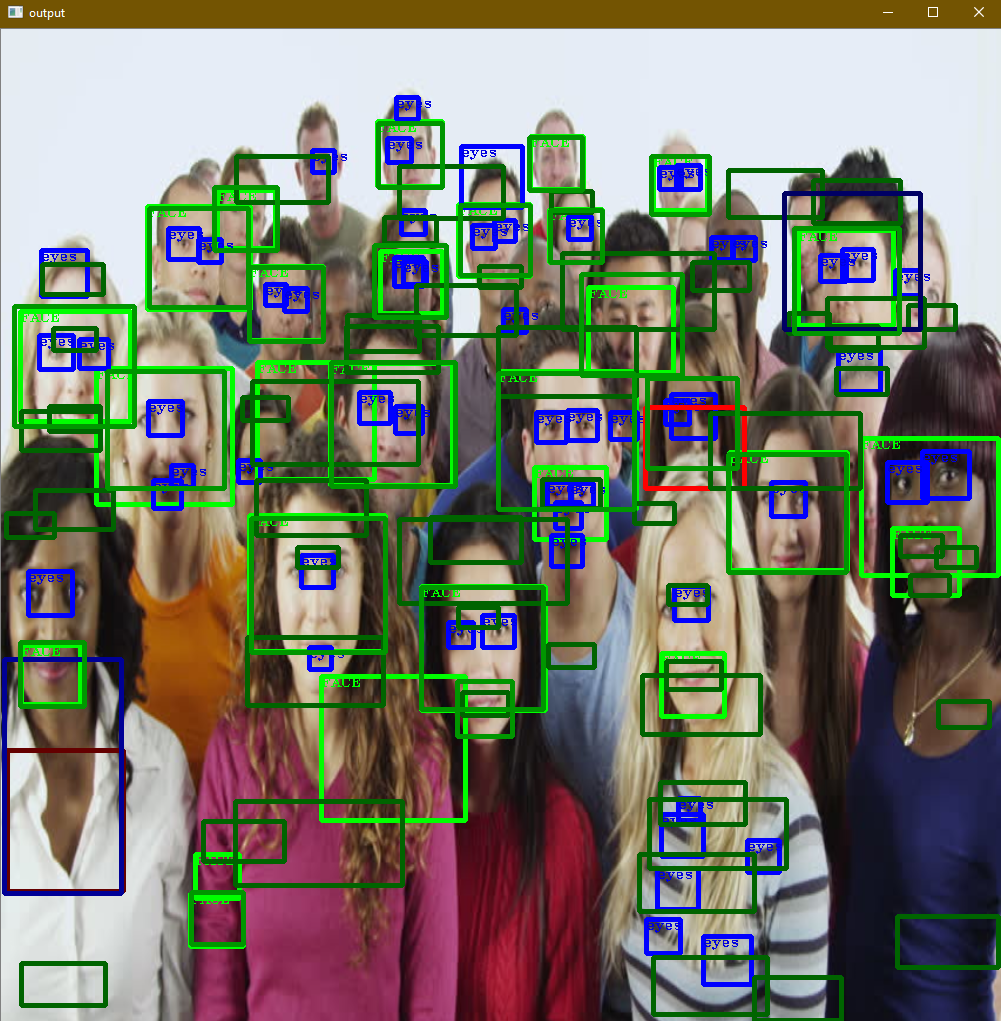

Now we can se how the out put image is cluttered with bounding boxes coz we have used so many classifiers.

Lets just use 2 classifiers FACE and EYES the result will be something like 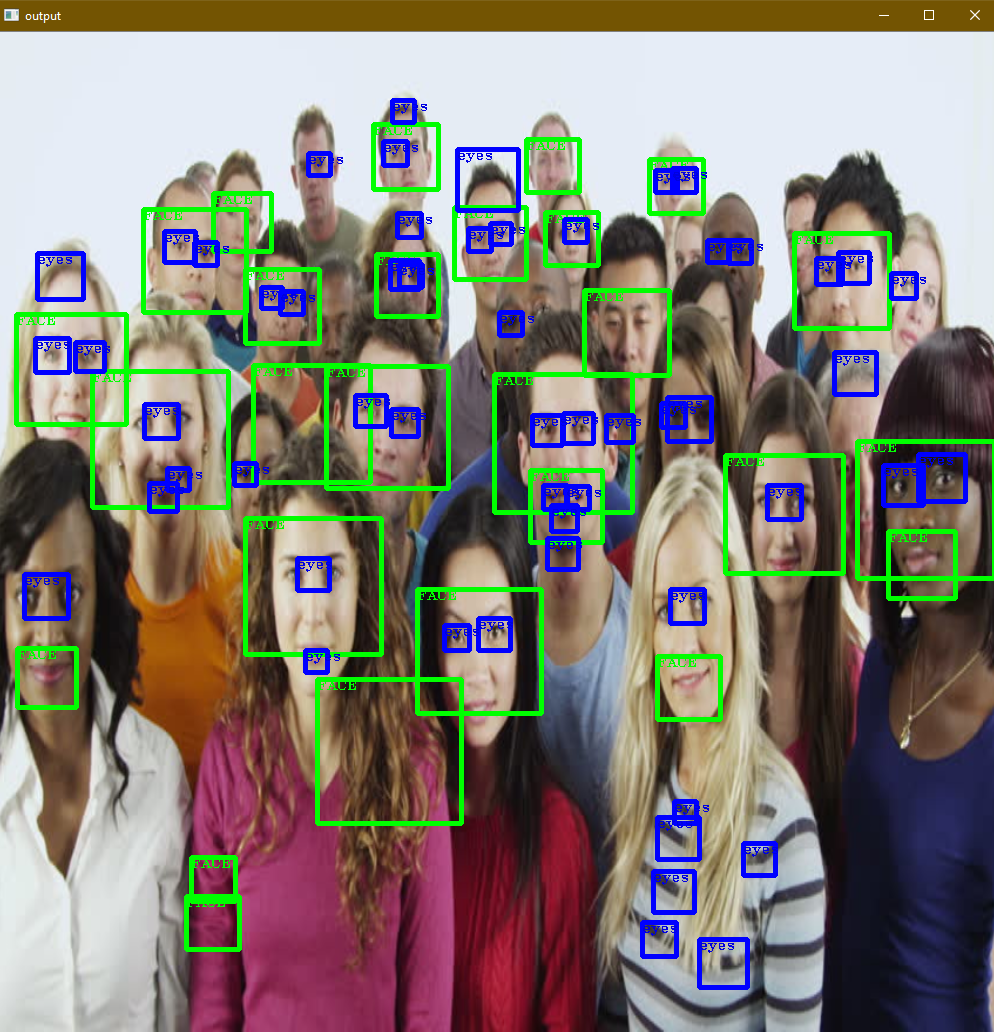

Less clutter and with some errors we have our output image.

With this folder I have attached one more Image file named 'crowd1.jpg'.
Just change the name in cv2.imread('xyz') and see the results yourself.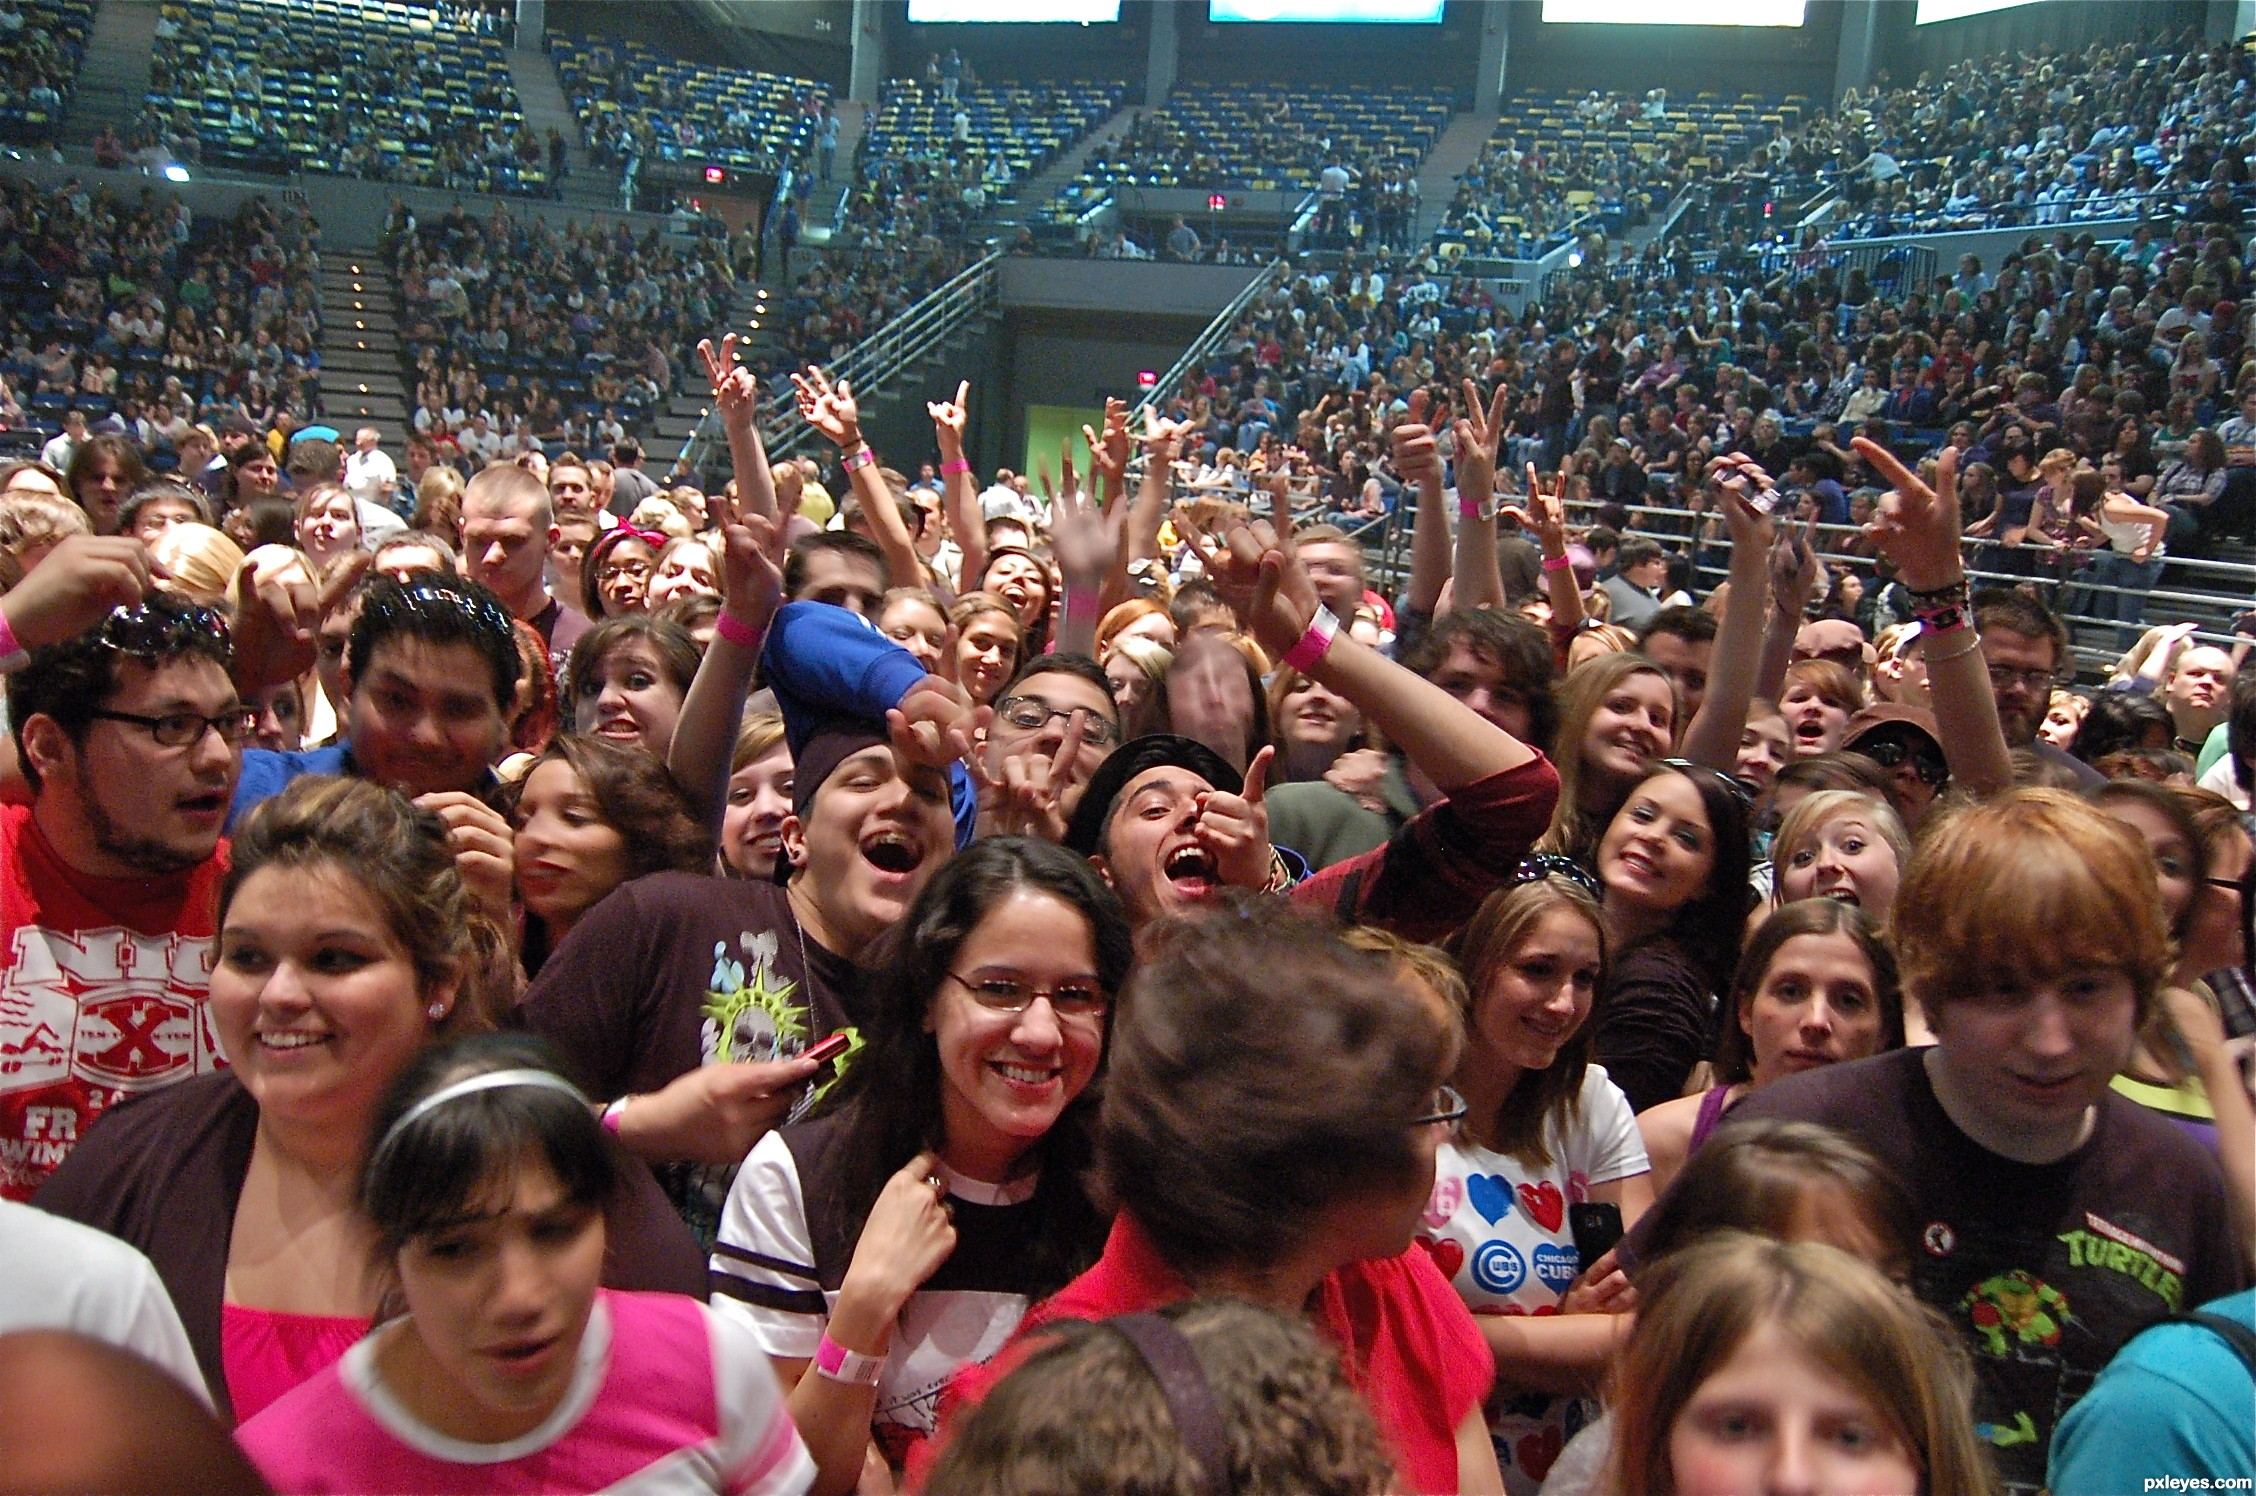